# Explore here

# ÍNDICE

1. [CARGA DE DATOS Y PRIMERAS IMPRESIONES](#1-carga-de-datos-y-primeras-impresiones)  
2. [LIMPIEZA Y TRATAMIENTO DE NULOS](#2-limpieza-y-tratamiento-de-nulos)  
3. [ANÁLISIS UNIVARIADO (UNIVARIANTE)](#3-análisis-univariado-univariante)  
   - [3.1: Categóricas](#31-categóricas)  
   - [3.2: Numéricas](#32-numéricas)  
4. [ANÁLISIS BIVARIADO O MULTIVARIANTE](#4-análisis-bivariado-o-multivariante)  
   - [4.1 Numérico-numérico](#41-numérico-numérico)  
   - [4.2 Categórico-categórico](#42-categórico-categórico)  
5. [ANÁLISIS DE CORRELACIONES](#5-análisis-de-correlaciones)  
6. [OUTLIERS (VALORES ATÍPICOS)](#6-outliers-valores-atípicos)  
7. [FEATURE ENGINEERING: "ESCALADO Y NORMALIZACIÓN DE VALORES"](#7-feature-engineering-escalado-y-normalización-de-valores)  
   - [7.1 Normalización](#71-normalización)  
   - [7.2 Escalado mín-max](#72-escalado-mín-max)
8. [MODELO DE REGRESIÓN LINEAL](#8-modelo-de-regresión-lineal)


## 1. CARGA DE DATOS Y PRIMERAS IMPRESIONES ##

In [12]:
# Your code here

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option('display.max_columns', None)

sns.set(
    style="whitegrid",     
    palette="pastel",              
)
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")
total_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86


In [10]:
total_data.shape

(1338, 7)

In [11]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 2. LIMPIEZA Y TRATAMIENTO DE NULOS ##

In [13]:
total_data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.55
1334,18,female,31.92,0,no,northeast,2205.98
1335,18,female,36.85,0,no,southeast,1629.83
1336,21,female,25.80,0,no,southwest,2007.94


###########

In [14]:
total_data.drop(["region"], axis = 1, inplace = True)
total_data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.92
1,18,male,33.77,1,no,1725.55
2,28,male,33.00,3,no,4449.46
3,33,male,22.70,0,no,21984.47
4,32,male,28.88,0,no,3866.86


In [15]:
total_data.shape

(1338, 6)

# 3. ANÁLISIS UNIVARIADO (UNIVARIANTE)

3.1 CATEGÓRICAS:

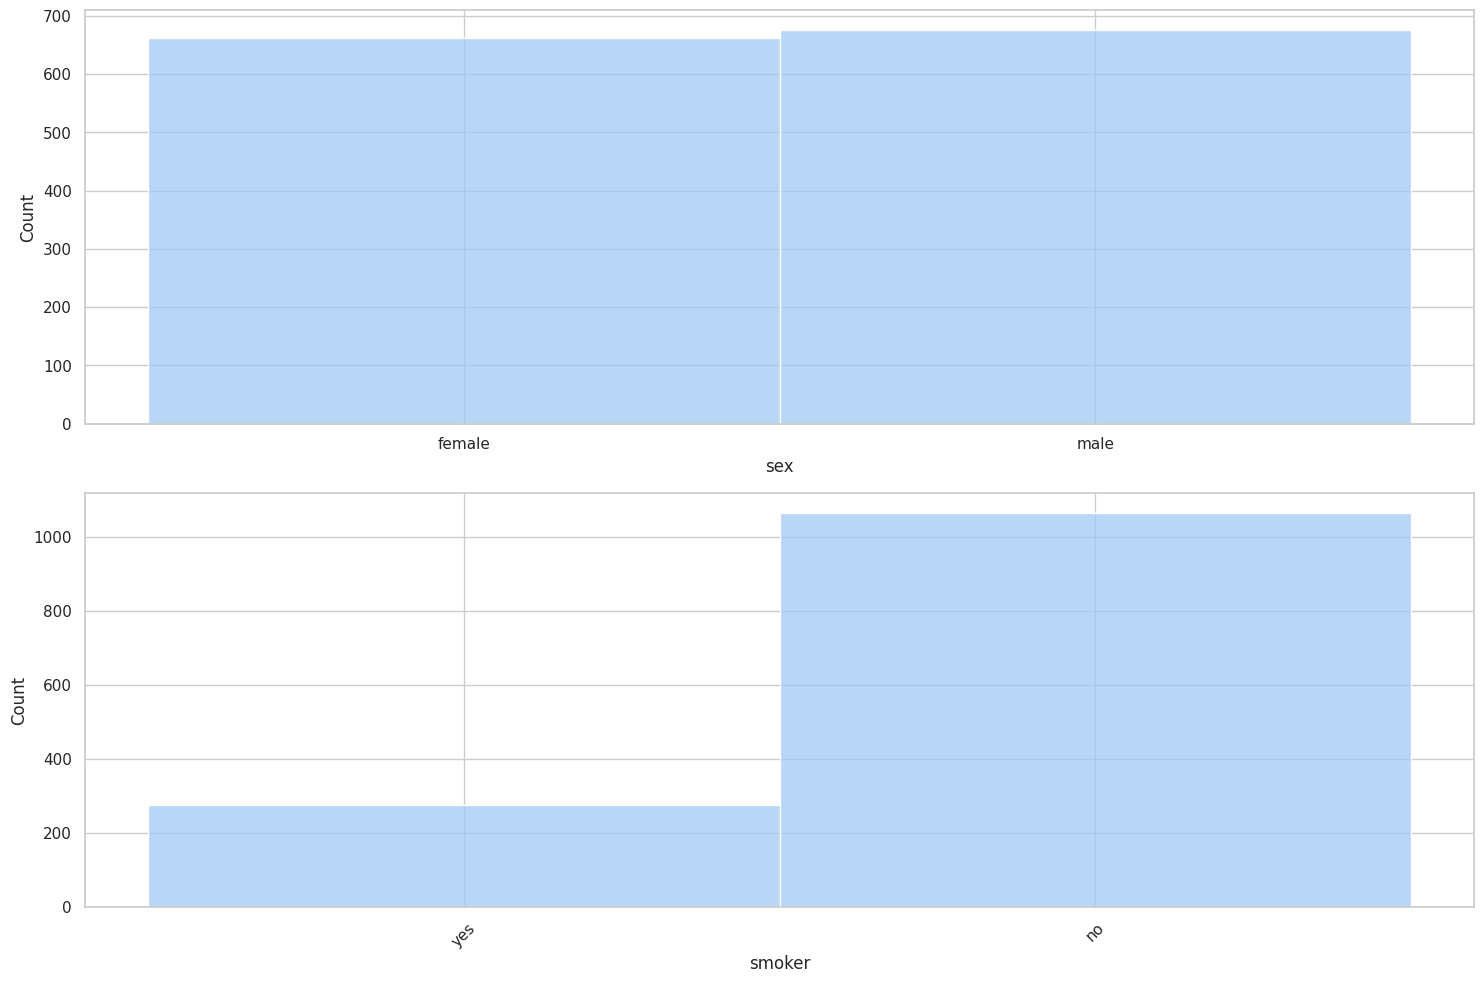

In [16]:
fig, axis = plt.subplots(2, figsize=(15, 10))

sns.histplot(ax = axis[0], data = total_data, x = "sex")
plt.xticks(rotation=45)
sns.histplot(ax = axis[1], data = total_data, x = "smoker")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


############

3.2 NUMÉRICAS:

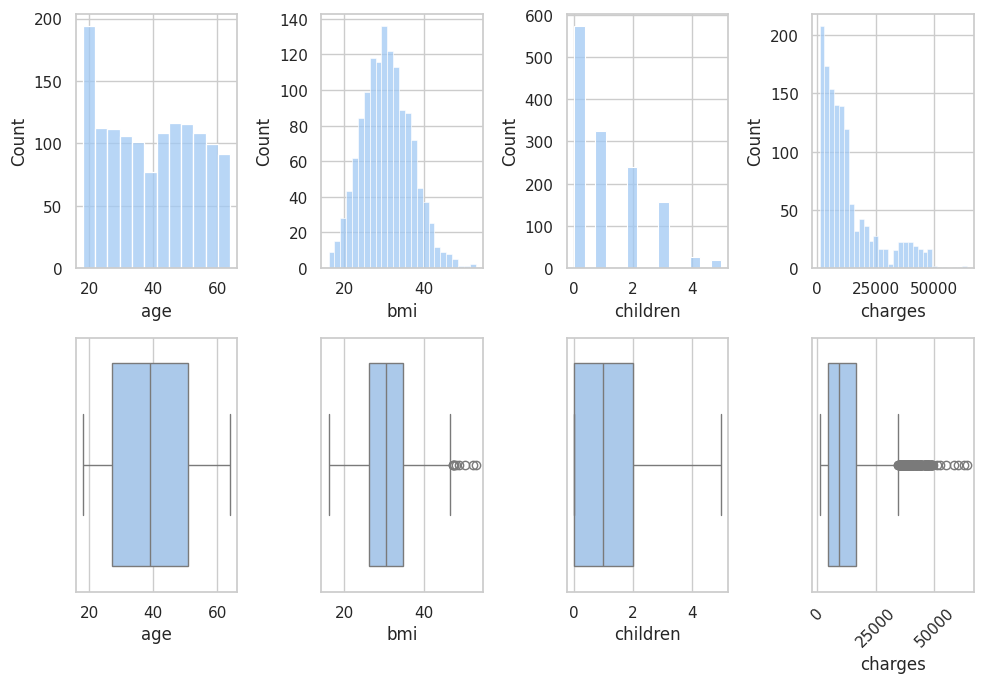

In [18]:
fig, axis = plt.subplots(2, 4, figsize = (10, 7))

sns.histplot(ax = axis[0, 0], data = total_data, x = "age")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "age")
sns.histplot(ax = axis[0, 1], data = total_data, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "bmi")
sns.histplot(ax = axis[0,2], data = total_data, x = "children")
sns.boxplot(ax = axis[1,2], data = total_data, x = "children")
sns.histplot(ax = axis[0,3], data = total_data, x = "charges")
sns.boxplot(ax = axis[1,3], data = total_data, x = "charges")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##############

# 4. ANÁLISIS BIVARIADO O MULTIVARIANTE 

4.1 NUMÉRICO-NUMÉRICO

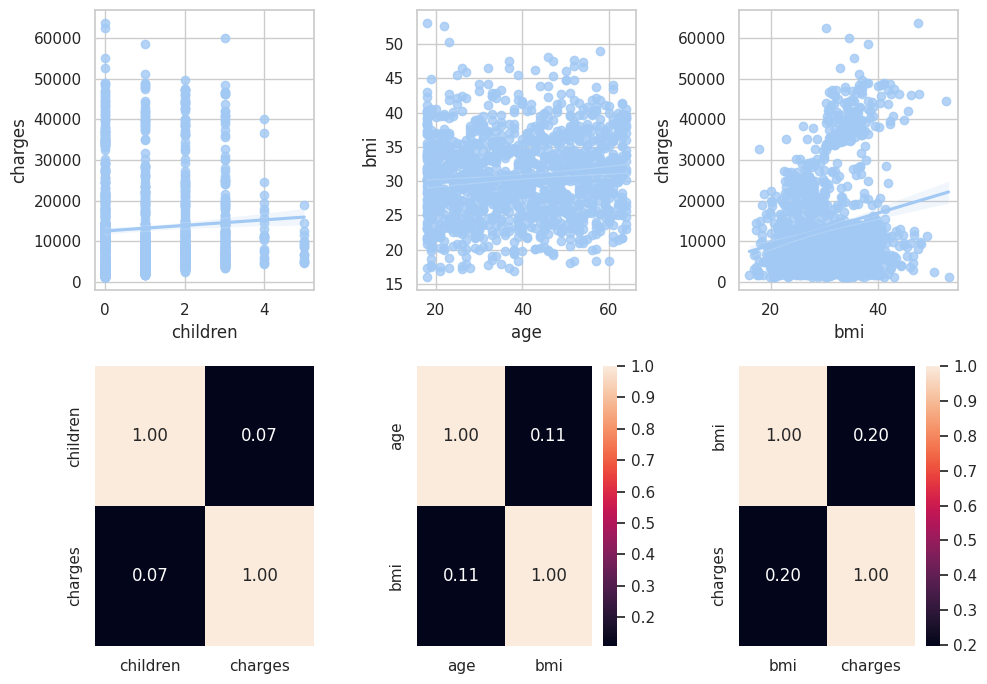

In [20]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = total_data, x = "children", y = "charges")
sns.heatmap(total_data[["children", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "bmi")
sns.heatmap(total_data[["age", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])

plt.tight_layout()

plt.show()


#########

4.2 CATEGÓRICO-CATEGÓRICO

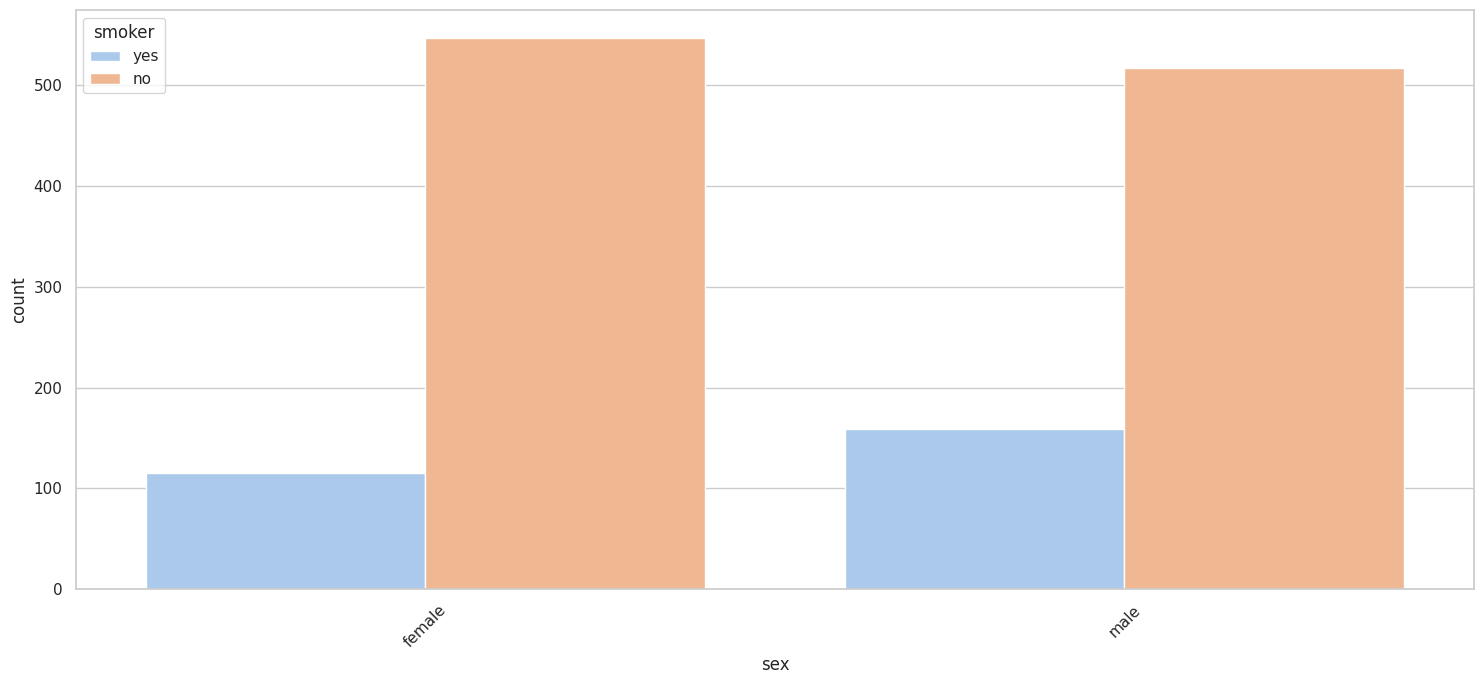

In [22]:
fig, axis = plt.subplots(1, figsize = (15, 7))

sns.countplot(data = total_data, x = "sex", hue = "smoker")
plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

##############

4.3 Combinaciones de la clase con varias predictoras

In [29]:
top_10_charges = total_data['charges'].value_counts().nlargest(10).index
filtered_data = total_data[total_data['charges'].isin(top_10_charges)]

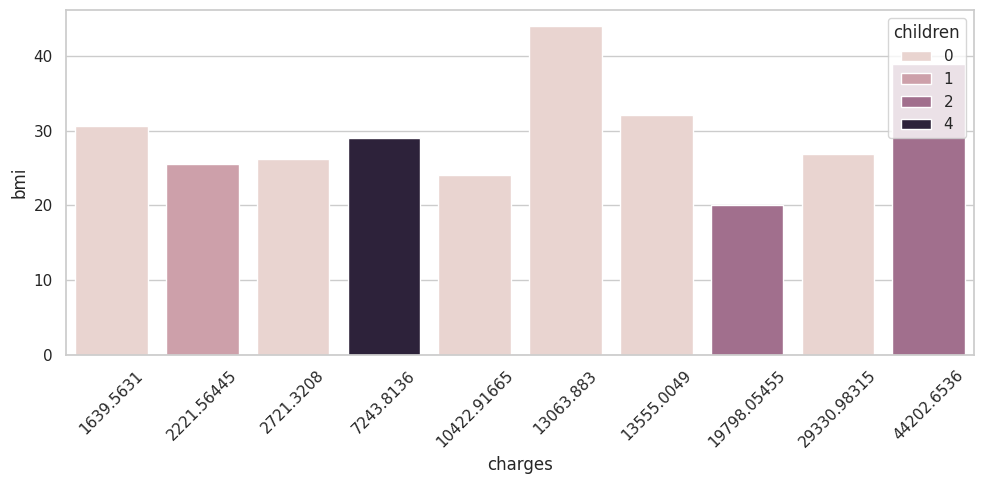

In [31]:

fig, axis = plt.subplots(figsize = (10, 5), ncols = 1)


sns.barplot(data = filtered_data, x = "charges", y = "bmi", hue = "children")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#############

# 5. ANÁLISIS DE CORRELACIONES

In [32]:
total_data["sex_n"] = pd.factorize(total_data["sex"])[0]
total_data[["sex_n", "sex"]]

,sex_n,sex
0,0,female
1,1,male
2,1,male
3,1,male
4,1,male
...,...,...
1333,1,male
1334,0,female
1335,0,female
1336,0,female


In [33]:
sex_rules = {row["sex"]: row["sex_n"] for index, row in total_data[["sex_n", "sex"]].drop_duplicates().iterrows()}
print(sex_rules)

import json

with open("./sex_rules.json", "w") as f:
  json.dump(sex_rules, f)

with open("./sex_rules.json", "r") as f:
    y_rules = json.load(f)
print("2", sex_rules)

total_data["sex_n"] = total_data["sex"].apply(lambda x: sex_rules[x])
total_data

{'female': 0, 'male': 1}
2 {'female': 0, 'male': 1}


,age,sex,bmi,children,smoker,charges,sex_n
0,19,female,27.90,0,yes,16884.92,0
1,18,male,33.77,1,no,1725.55,1
2,28,male,33.00,3,no,4449.46,1
3,33,male,22.70,0,no,21984.47,1
4,32,male,28.88,0,no,3866.86,1
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,10600.55,1
1334,18,female,31.92,0,no,2205.98,0
1335,18,female,36.85,0,no,1629.83,0
1336,21,female,25.80,0,no,2007.94,0


In [34]:
total_data["smoker_n"] = pd.factorize(total_data["smoker"])[0]
total_data[["smoker_n", "smoker"]]

,smoker_n,smoker
0,0,yes
1,1,no
2,1,no
3,1,no
4,1,no
...,...,...
1333,1,no
1334,1,no
1335,1,no
1336,1,no


In [35]:
smoker_rules = {row["smoker"]: row["smoker_n"] for index, row in total_data[["smoker_n", "smoker"]].drop_duplicates().iterrows()}
print(smoker_rules)

import json

with open("./smoker_rules.json", "w") as f:
  json.dump(smoker_rules, f)

with open("./smoker_rules.json", "r") as f:
    smoker_rules = json.load(f)
print("2", smoker_rules)

total_data["smoker_n"] = total_data["smoker"].apply(lambda x: smoker_rules[x])
total_data

{'yes': 0, 'no': 1}
2 {'yes': 0, 'no': 1}


,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.90,0,yes,16884.92,0,0
1,18,male,33.77,1,no,1725.55,1,1
2,28,male,33.00,3,no,4449.46,1,1
3,33,male,22.70,0,no,21984.47,1,1
4,32,male,28.88,0,no,3866.86,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,10600.55,1,1
1334,18,female,31.92,0,no,2205.98,0,1
1335,18,female,36.85,0,no,1629.83,0,1
1336,21,female,25.80,0,no,2007.94,0,1


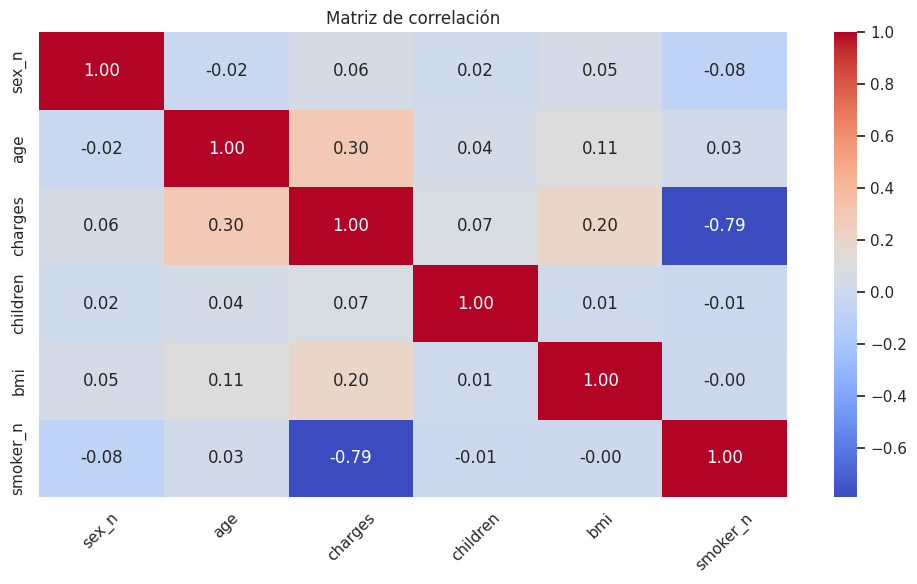

In [36]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data[["sex_n", "age", "charges", "children", "bmi", "smoker_n"]].corr(), annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Matriz de correlación")
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##########

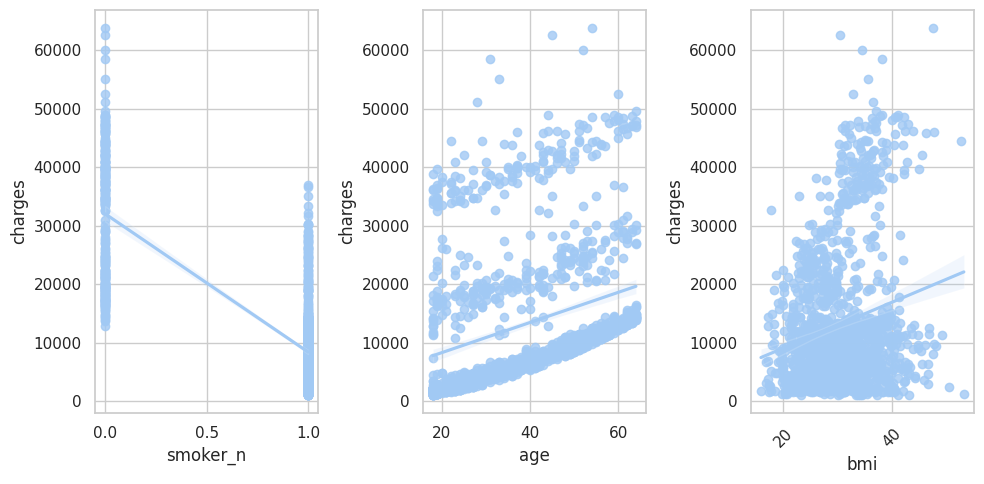

In [37]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 3)
sns.regplot(ax = axis[0], data = total_data, x = "smoker_n", y = "charges")
sns.regplot(ax = axis[1], data = total_data, x = "age", y = "charges")
sns.regplot(ax = axis[2], data = total_data, x = "bmi", y = "charges")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#########

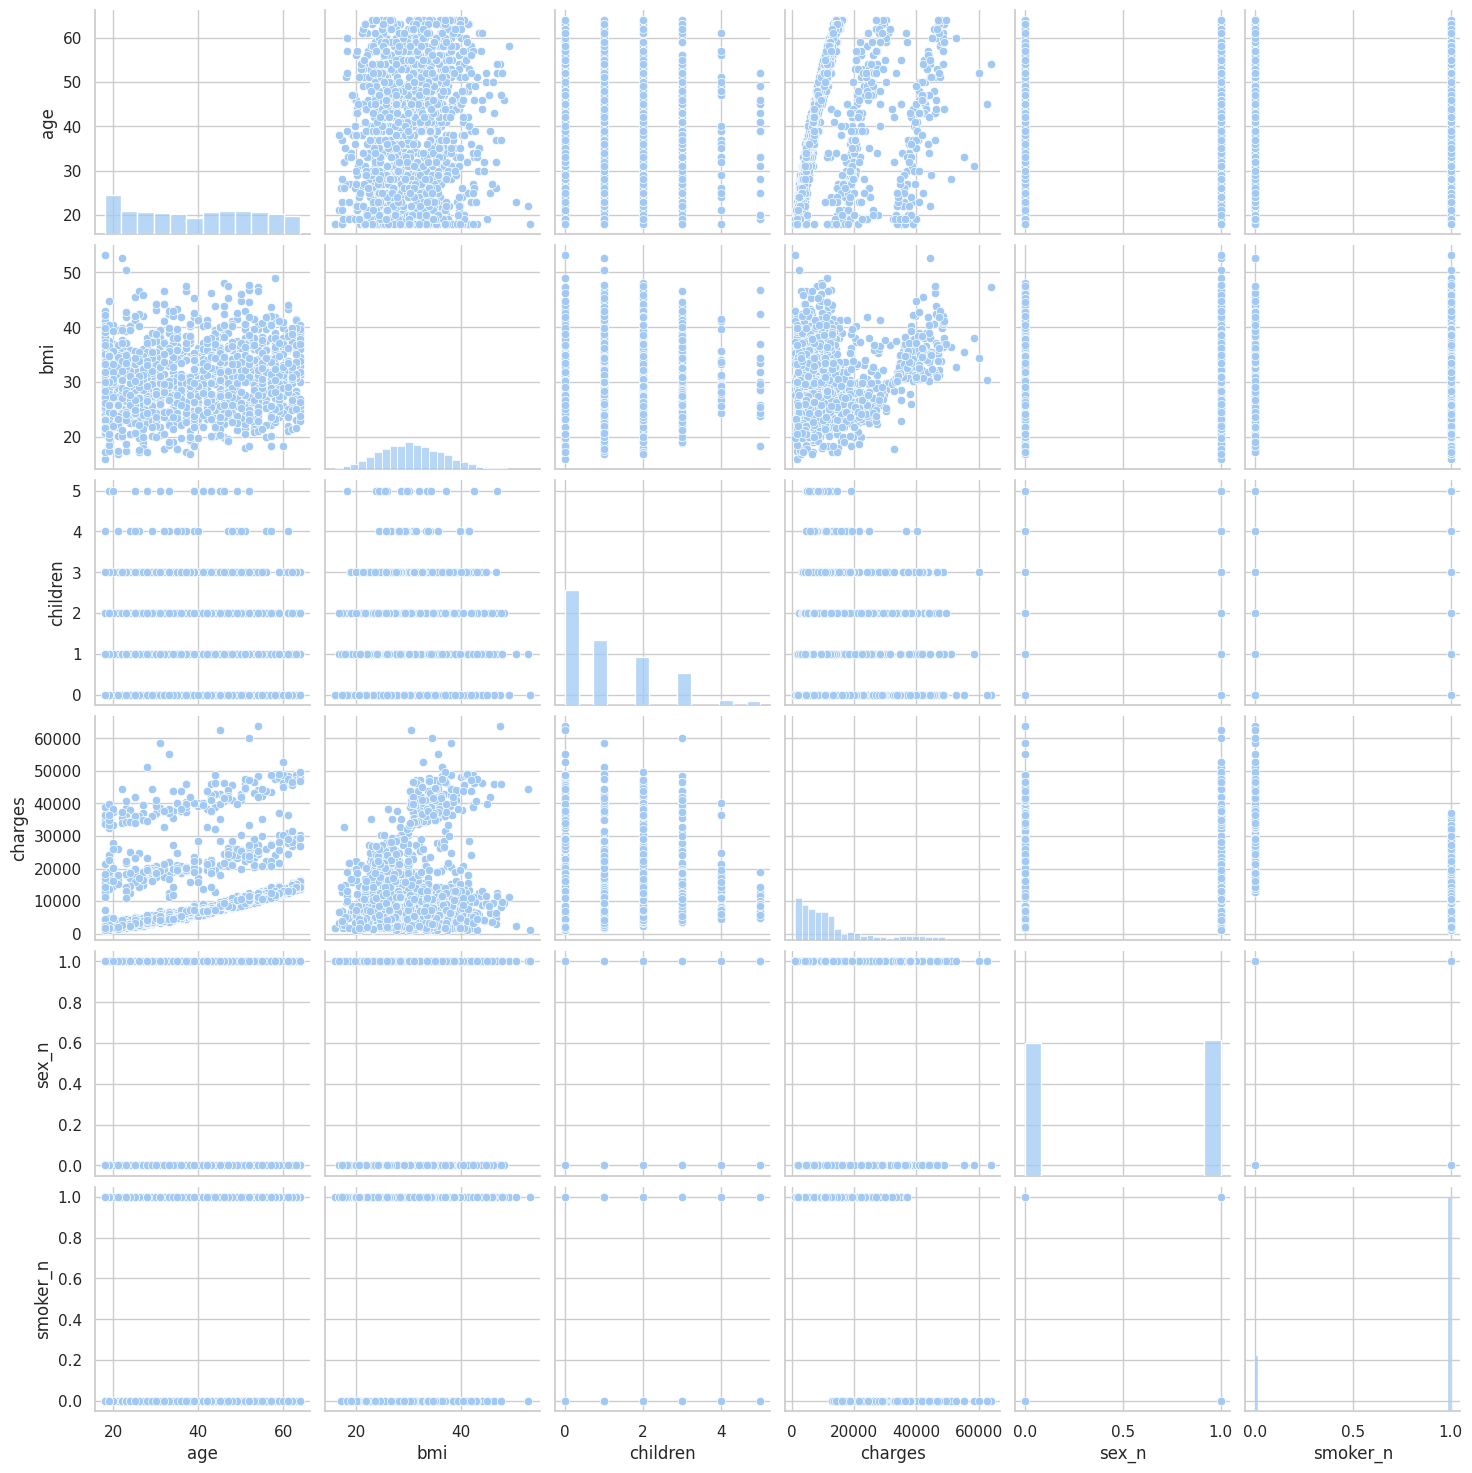

In [38]:
sns.pairplot(data = total_data)

########

In [39]:
total_data.describe()

,age,bmi,children,charges,sex_n,smoker_n
count,1338.00,1338.00,1338.00,1338.00,1338.00,1338.0
mean,39.21,30.66,1.09,13270.42,0.51,0.8
std,14.05,6.10,1.21,12110.01,0.50,0.4
min,18.00,15.96,0.00,1121.87,0.00,0.0
25%,27.00,26.30,0.00,4740.29,0.00,1.0
50%,39.00,30.40,1.00,9382.03,1.00,1.0
75%,51.00,34.69,2.00,16639.91,1.00,1.0
max,64.00,53.13,5.00,63770.43,1.00,1.0


# 6. OUTLIERS (VALORES ATÍPICOS)

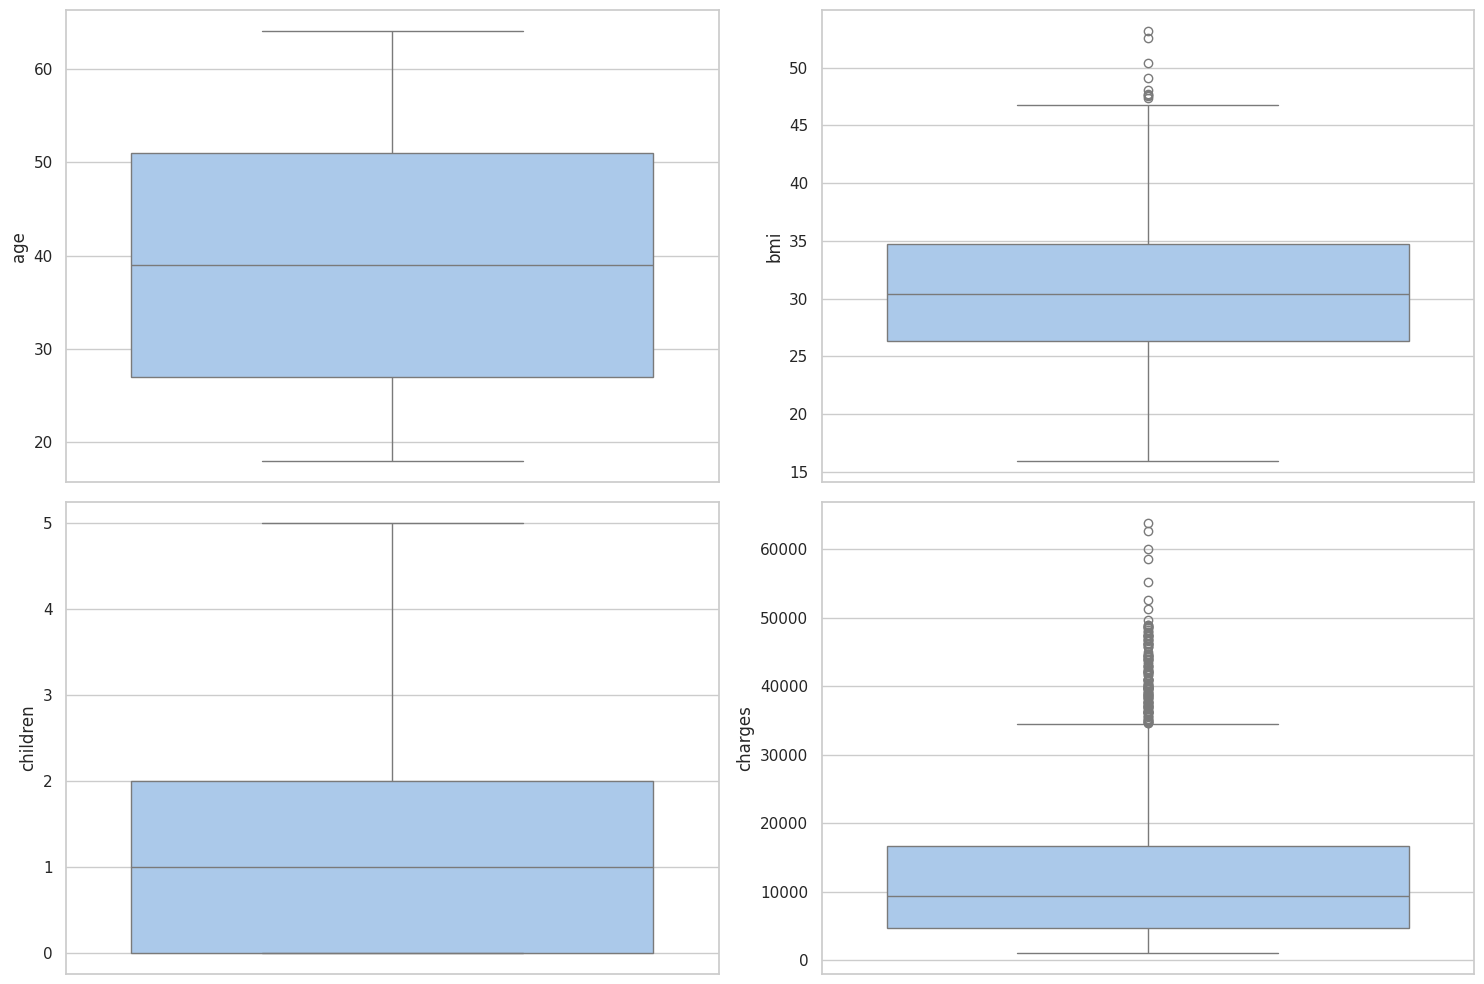

In [44]:
fig, axis = plt.subplots(2, 2, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "age")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "bmi")
sns.boxplot(ax = axis[1,0], data = total_data, y = "children")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "charges")


plt.tight_layout()

plt.show()

##############

In [ ]:
numerical_columns = [
  "age",  
  "children", 
  "charges", 
  "bmi", 
  ]

for column in numerical_columns:
  stats = total_data[column].describe()
  iqr = stats["75%"] - stats["25%"]
  upper_limit = stats["75%"] + 1.5 * iqr
  lower_limit = stats["75%"] - 1.5 * iqr
  if lower_limit < 0:
    lower_limit = 0
    print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 5.0 y 0, con un rango intercuartílico de 2.0
Los límites superior e inferior para la búsqueda de outliers son 34489.35 y 0, con un rango intercuartílico de 11899.63


In [46]:
total_data_CON_outliers = total_data.copy()

total_data_SIN_outliers = total_data.copy()

def replace_outliers_from_column(column, total_data):
  column_stats = total_data[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0: lower_limit = min(total_data[column])
  total_data[column] = total_data[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  total_data[column] = total_data[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return total_data.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ['bmi']:
  total_data_SIN_outliers, limit_list = replace_outliers_from_column(column, total_data_SIN_outliers)
  outliers_dict[column] = limit_list

outliers_dict

{'bmi': [np.float64(13.7), np.float64(47.290000000000006)]}

In [47]:
total_data_CON_outliers

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.90,0,yes,16884.92,0,0
1,18,male,33.77,1,no,1725.55,1,1
2,28,male,33.00,3,no,4449.46,1,1
3,33,male,22.70,0,no,21984.47,1,1
4,32,male,28.88,0,no,3866.86,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,10600.55,1,1
1334,18,female,31.92,0,no,2205.98,0,1
1335,18,female,36.85,0,no,1629.83,0,1
1336,21,female,25.80,0,no,2007.94,0,1


In [48]:
total_data_SIN_outliers

,age,sex,bmi,children,smoker,charges,sex_n,smoker_n
0,19,female,27.90,0,yes,16884.92,0,0
1,18,male,33.77,1,no,1725.55,1,1
2,28,male,33.00,3,no,4449.46,1,1
3,33,male,22.70,0,no,21984.47,1,1
4,32,male,28.88,0,no,3866.86,1,1
...,...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,10600.55,1,1
1334,18,female,31.92,0,no,2205.98,0,1
1335,18,female,36.85,0,no,1629.83,0,1
1336,21,female,25.80,0,no,2007.94,0,1


########

In [49]:
total_data_CON_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

In [50]:
total_data_SIN_outliers.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
charges     0
sex_n       0
smoker_n    0
dtype: int64

In [51]:
total_data.isnull().sum().sort_values(ascending=False) / len(total_data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
charges     0.0
sex_n       0.0
smoker_n    0.0
dtype: float64

En el presente EDA no necesitamos rellenar/reemplazar nulos ya que como podemos observar, tanto en el dataset con outliers como sin outliers no se encuentran valores nulos.

# 7. FEATURE ENGINEERING: "ESCALADO Y NORMALIZACIÓN DE VALORES"

In [54]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "children", "bmi", "sex_n", "smoker_n"]

# Comentario: Ahora SÍ es el turno de la división del conjunto de datos en muestras de train y test: 

X_CON = total_data_CON_outliers.drop("charges", axis = 1)[num_variables]
y = total_data_CON_outliers["charges"]
X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_CON, y, test_size = 0.2, random_state = 42)

X_SIN = total_data_SIN_outliers.drop("charges", axis = 1)[num_variables]
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_SIN, test_size = 0.2, random_state = 42)

X_train_con_outliers.head()

,age,children,bmi,sex_n,smoker_n
560,46,2,19.95,0,1
1285,47,0,24.32,0,1
1142,52,0,24.86,0,1
969,39,5,34.32,0,1
486,54,3,21.47,0,1


7.1 NORMALIZACIÓN:

In [55]:
from sklearn.preprocessing import StandardScaler
import pickle

normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)


normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_norm.head()

,age,children,bmi,sex_n,smoker_n
560,0.47,0.73,-1.76,-1.02,0.51
1285,0.54,-0.91,-1.03,-1.02,0.51
1142,0.90,-0.91,-0.94,-1.02,0.51
969,-0.03,3.20,0.62,-1.02,0.51
486,1.04,1.56,-1.50,-1.02,0.51


7.2 ESCALADO MÍN-MAX:

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

X_train_con_outliers_scal.head()

,age,children,bmi,sex_n,smoker_n
560,0.61,0.4,0.11,0.0,1.0
1285,0.63,0.0,0.22,0.0,1.0
1142,0.74,0.0,0.24,0.0,1.0
969,0.46,1.0,0.49,0.0,1.0
486,0.78,0.6,0.15,0.0,1.0


In [61]:
X_train_con_outliers.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_sin_outliers.xlsx", index = False)
X_train_con_outliers_norm.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_train_sin_outliers_norm.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_train_con_outliers_scal.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_con_outliers_scal.xlsx", index = False)
X_train_sin_outliers_scal.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_train_sin_outliers_scal.xlsx", index = False)

X_test_con_outliers.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_sin_outliers.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_con_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_sin_outliers_norm.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_con_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/X_test_sin_outliers_scal.xlsx", index = False)

y_train.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/y_train.xlsx", index = False)
y_test.to_excel("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/y_test.xlsx", index = False)

with open("/workspaces/ginappedrosa-ML-medical_insurance_cost/models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

with open("/workspaces/ginappedrosa-ML-medical_insurance_cost/models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

with open("/workspaces/ginappedrosa-ML-medical_insurance_cost/models/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

with open("/workspaces/ginappedrosa-ML-medical_insurance_cost/models/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)


In [63]:
from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 5)
selection_model.fit(X_train_con_outliers, y_train)

ix = selection_model.get_support()
X_train_con_outliers_sel = pd.DataFrame(selection_model.transform(X_train_con_outliers), columns = X_train_con_outliers.columns.values[ix])
X_test_con_outliers_sel = pd.DataFrame(selection_model.transform(X_test_con_outliers), columns = X_test_con_outliers.columns.values[ix])

X_train_con_outliers_sel.head()

/home/vscode/.local/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:107: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


,age,children,bmi,sex_n,smoker_n
0,46.0,2.0,19.95,0.0,1.0
1,47.0,0.0,24.32,0.0,1.0
2,52.0,0.0,24.86,0.0,1.0
3,39.0,5.0,34.32,0.0,1.0
4,54.0,3.0,21.47,0.0,1.0


In [64]:
X_test_con_outliers_sel.head()

,age,children,bmi,sex_n,smoker_n
0,45.0,2.0,25.18,0.0,1.0
1,36.0,0.0,30.02,0.0,1.0
2,64.0,0.0,26.89,0.0,0.0
3,46.0,3.0,25.75,1.0,1.0
4,19.0,0.0,31.92,1.0,0.0


In [65]:
X_train_con_outliers_sel["charges"] = list(y_train)
X_test_con_outliers_sel["charges"] = list(y_test)

In [66]:
X_train_con_outliers_sel.to_csv("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/bank_info.csv", index=False)
X_test_con_outliers_sel.to_csv("/workspaces/ginappedrosa-ML-medical_insurance_cost/data/processed/bank_info.csv", index=False)

# 8. MODELO DE REGRESIÓN LINEAL

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

r2_results = []
mse_results = []

for dataset in [
    X_train_con_outliers,
    X_train_sin_outliers,
    X_train_con_outliers_norm,
    X_train_sin_outliers_norm,
    X_train_con_outliers_scal,
    X_train_sin_outliers_scal,
    X_train_con_outliers_sel,
]:
    model = LinearRegression()
    model.fit(dataset, y_train)
    y_pred = model.predict(dataset)
    
    r2 = r2_score(y_train, y_pred)
    mse = mean_squared_error(y_train, y_pred)
    
    r2_results.append(r2)
    mse_results.append(mse)

print("R2 scores:", r2_results)
print("Mejor R2:", max(r2_results))
print("MSE:", mse_results)
print("Menor MSE:", min(mse_results))


R2 scores: [0.7410888590280913, 0.7414527196921326, 0.7410888590280913, 0.7414527196921326, 0.7410888590280913, 0.7414527196921326, 1.0]
Mejor R2: 1.0
MSE: [37369582.73531941, 37317065.40779932, 37369582.73531941, 37317065.407799326, 37369582.73531941, 37317065.407799326, 1.7719832159471237e-23]
Menor MSE: 1.7719832159471237e-23


Mejor dataset tanto a nidel de R2 como de MSE: X_train_con_outliers_sel